Download the compressed dataset `horse-or-human.zip`.

In [ ]:
import urllib.request
import zipfile
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop


In [ ]:
data_url_1 =  'https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip'

urllib.request.urlretrieve(data_url_1, 'horse-or-human.zip')
local_file = 'horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_file, 'r')
zip_ref.extractall('data/horse-or-human')

data_url_2 = 'https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip'
urllib.request.urlretrieve(data_url_2, 'validation-horse-or-human.zip')
local_file = 'validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_file, 'r')
zip_ref.extractall('data/validation-horse-or-human')
zip_ref.close()

In [ ]:
import zipfile

# Unzip the dataset
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')

# Unzip validation set
local_zip = './validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./validation-horse-or-human')

zip_ref.close()

Masukan dari file .zip diekstrak ke direktori utama `./horse-or-human`, yang masing-masing berisi subdirektori `horses` dan `humans`.

Memberi label pada gambar sesuai dengan nama direktori dan strukturnya secara otomatis diprogram

In [ ]:
import os

# Directory with our training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')

# Directory with validation horse pictures
validation_horse_dir = os.path.join('./validation-horse-or-human/horses')

# Directory with validation human pictures
validation_human_dir = os.path.join('./validation-horse-or-human/humans')

Melihat direktori pelatihan dan validasi kuda dan manusia dari nama file:

In [ ]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

validation_horse_names = os.listdir(validation_horse_dir)
print(f'VAL SET HORSES: {validation_horse_names[:10]}')

validation_human_names = os.listdir(validation_human_dir)
print(f'VAL SET HUMANS: {validation_human_names[:10]}')

['horse40-7.png', 'horse11-0.png', 'horse22-4.png', 'horse19-7.png', 'horse18-4.png', 'horse45-6.png', 'horse31-7.png', 'horse21-1.png', 'horse28-2.png', 'horse34-4.png']
['human02-16.png', 'human09-10.png', 'human17-21.png', 'human12-20.png', 'human08-22.png', 'human09-21.png', 'human16-04.png', 'human10-19.png', 'human15-08.png', 'human06-10.png']
VAL SET HORSES: ['horse3-217.png', 'horse1-411.png', 'horse1-241.png', 'horse6-004.png', 'horse4-439.png', 'horse6-544.png', 'horse2-218.png', 'horse4-345.png', 'horse5-589.png', 'horse5-303.png']
VAL SET HUMANS: ['valhuman02-00.png', 'valhuman02-18.png', 'valhuman03-15.png', 'valhuman05-12.png', 'valhuman04-04.png', 'valhuman02-10.png', 'valhuman05-05.png', 'valhuman01-19.png', 'valhuman03-22.png', 'valhuman01-00.png']


Jumlah total gambar kuda dan manusia di direktori:

---



In [ ]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))
print(f'total validation horse images: {len(os.listdir(validation_horse_dir))}')
print(f'total validation human images: {len(os.listdir(validation_human_dir))}')

#total training horse images: 500
#total training human images: 527
#total validation horse images: 128
#total validation human images: 128

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


Konfigurasikan parameter matplotlib:

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameter untuk grafik akan menampilkan gambar dalam konfigurasi 4x4
nrows = 4
ncols = 4

# Indeks untuk iterasi atas gambar
pic_index = 0

Melihat beberapa gambar untuk mendapatkan gambaran yang lebih baik tentang seperti apa bentuknya (kumpulan 8 gambar kuda dan 8 gambar manusia):

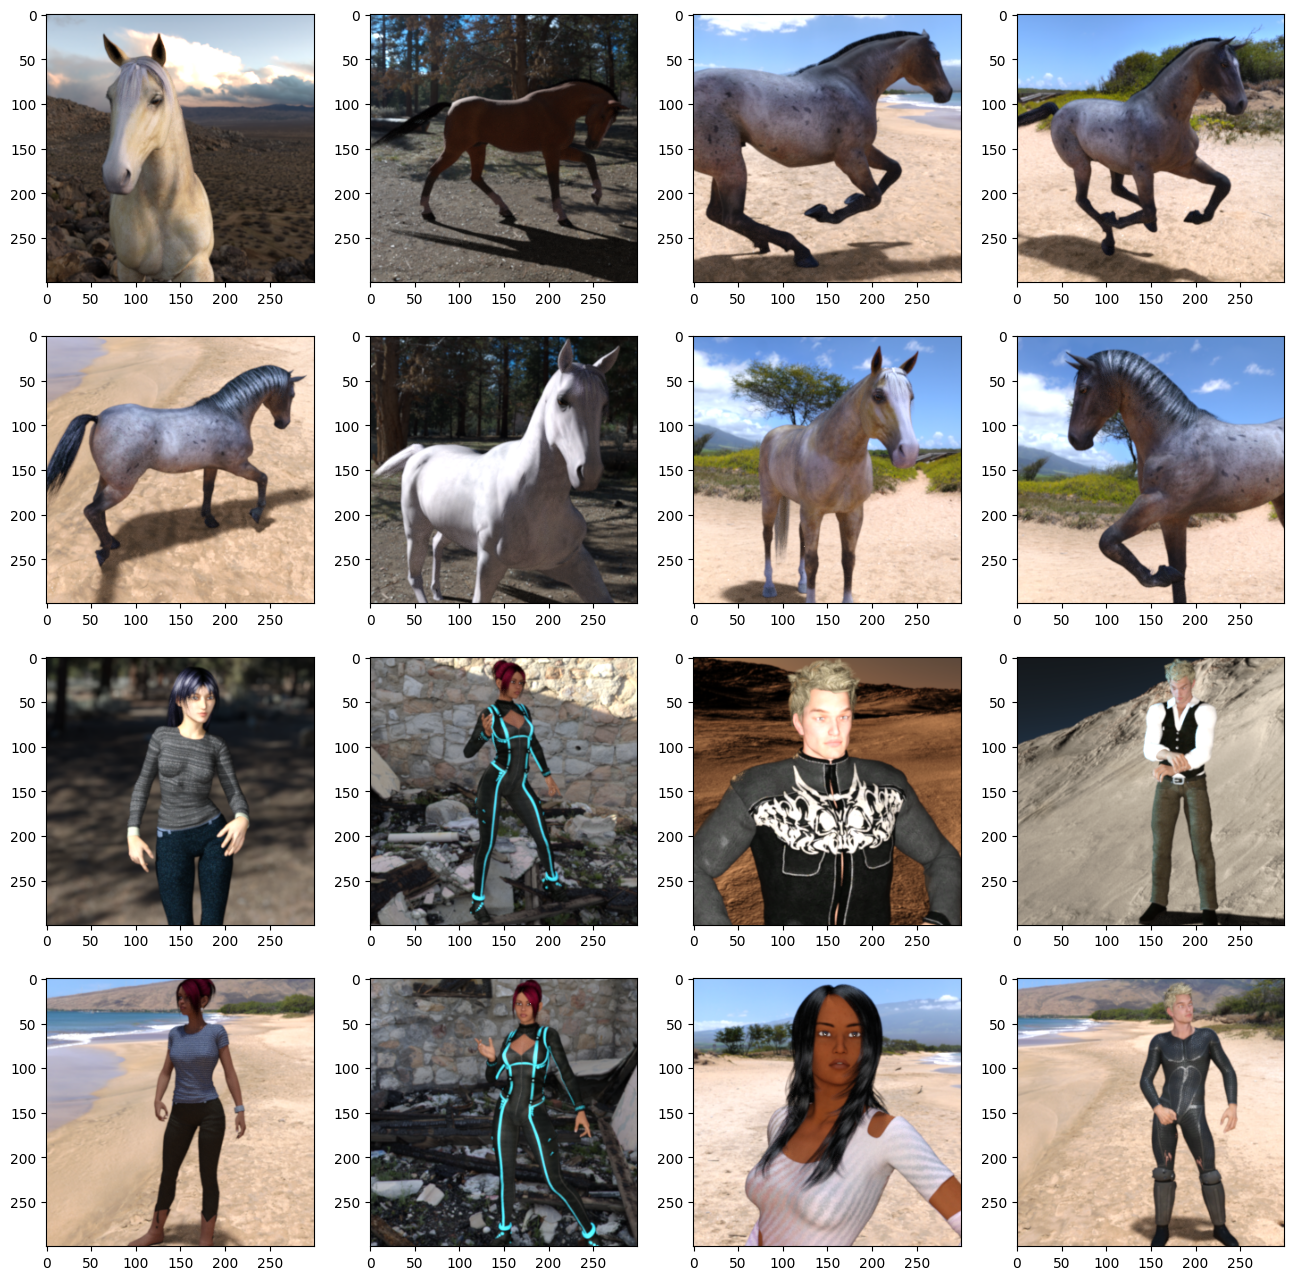

In [ ]:
# menyiapkan gambar matplotlib, dan ukurannya agar sesuai dengan foto 4x4
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname)
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname)
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('On') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

Membangun Model Kecil dari Awal:

In [ ]:
import tensorflow as tf

Menambahkan lapisan-lapisan konvolusional seperti pada contoh sebelumnya, dan ratakan hasil akhir untuk dimasukkan ke dalam lapisan terhubung secara padat. Karena ini adalah masalah klasifikasi dua kelas, yaitu masalah klasifikasi biner, kami mengakhiri jaringan dengan aktivasi sigmoid. Hal ini membuat nilai output dari jaringan kami menjadi skalar tunggal antara 0 dan 1, yang mengkodekan probabilitas bahwa gambar saat ini adalah kelas 1 (berlawanan dengan kelas 0).

Sebagai penggantian dari 300x300 seperti pada dua percobaan sebelumnya, kami menentukan larik yang lebih kecil, yaitu 150x150.

##Model Arsitektur GoogleNet


In [ ]:
#Model Arsitektur GoogleNet
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Bentuk input adalah ukuran gambar yang diinginkan 150x150 dengan warna 3 byte
# Ini adalah konvolusi pertama
model = tf.keras.models.Sequential([
    Conv2D(64, (7,7), strides=2, padding='same', activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(3,3), strides=2),

    # Inception 1
    Conv2D(64, (1,1), padding='same', activation='relu'),
    Conv2D(128, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3,3), strides=2),

    # Inception 2
    Conv2D(192, (1,1), padding='same', activation='relu'),
    Conv2D(96, (3,3), padding='same', activation='relu'),
    Conv2D(128, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3,3), strides=2),

    # Inception 3
    Conv2D(160, (1,1), padding='same', activation='relu'),
    Conv2D(128, (3,3), padding='same', activation='relu'),
    Conv2D(256, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3,3), strides=2),

    # Inception 4
    Conv2D(256, (1,1), padding='same', activation='relu'),
    Conv2D(128, (3,3), padding='same', activation='relu'),
    Conv2D(256, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3,3), strides=2),

    # Inception 5
    Conv2D(384, (1,1), padding='same', activation='relu'),
    Conv2D(192, (3,3), padding='same', activation='relu'),
    Conv2D(256, (3,3), padding='same', activation='relu'),

    # Output
    Flatten(),
    Dense(1, activation='sigmoid')
])


## Tinjau arsitektur jaringan GoogleNet dan bentuk output

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 75, 75, 64)        9472      
                                                                 
 max_pooling2d (MaxPooling2  (None, 37, 37, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 37, 64)        4160      
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 18, 18, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 18, 18, 192)       2

## Configure the specifications for model training:

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(loss='mean_squared_error',  # Menggunakan mean squared error sebagai fungsi loss
              optimizer=Adam(learning_rate=0.0001),  # Menurunkan learning rate untuk lebih stabil
              metrics=['accuracy'])


In [ ]:
#from tensorflow.keras.optimizers import RMSprop

#model.compile(loss='binary_crossentropy',
              #optimizer=RMSprop(learning_rate=0.001),
              #metrics=['accuracy'])


Langkah selanjutnya adalah mengatur generator data yang akan membaca gambar di folder sumber, mengubahnya menjadi tensor float32, dan memberi mereka makan (dengan labelnya) ke model. Ada generator untuk gambar pelatihan dan data validasi. Generator ini akan menghasilkan batch gambar ukuran 150x150 dan labelnya (biner).

In [ ]:
# Impor pustaka ImageDataGenerator dari TensorFlow Keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Semua gambar akan diubah skalanya sebesar 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Gambar pelatihan aliran dalam batch 128 menggunakan generator train_datagen
train_generator = train_datagen.flow_from_directory(
        './horse-or-human/',  # Ini adalah direktori sumber untuk gambar pelatihan
        target_size=(150, 150),  # Semua gambar akan diubah ukurannya menjadi 150x150
        batch_size=128,
        # Karena menggunakan kerugian binary_crossentropy, maka memerlukan label biner
        class_mode='binary')

# Flow validation images in batches of 128 using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        './validation-horse-or-human/',  # Ini adalah direktori sumber untuk gambar validasi
        target_size=(150, 150),  # Semua gambar akan diubah ukurannya menjadi 150x150
        batch_size=32,
        # Karena  menggunakan kerugian binary_crossentropy, maka memerlukan label biner
        class_mode='binary')

# Ditemukan 1027 gambar milik 2 kelas.
# Ditemukan 256 gambar milik 2 kelas.


Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


 Training for 15 epochs:



In [ ]:
# Menentukan tingkat verbositas pelatihan model

history = model.fit(
      train_generator,
      steps_per_epoch=8,
      epochs= 30,
      validation_data = validation_generator,
      verbose=1)

#Epoch 15/15
#8/8 [==============================] - 6s 822ms/step - loss: 0.1887 - accuracy: 0.9533 - val_loss: 0.6845 - val_accuracy: 0.8594


Epoch 1/30
8/8 [==============================] - 23s 911ms/step - loss: 0.2500 - accuracy: 0.5595 - val_loss: 0.2500 - val_accuracy: 0.5000
Epoch 2/30
8/8 [==============================] - 7s 860ms/step - loss: 0.2500 - accuracy: 0.5895 - val_loss: 0.2499 - val_accuracy: 0.5000
Epoch 3/30
8/8 [==============================] - 8s 988ms/step - loss: 0.2499 - accuracy: 0.5117 - val_loss: 0.2498 - val_accuracy: 0.5000
Epoch 4/30
8/8 [==============================] - 7s 811ms/step - loss: 0.2494 - accuracy: 0.5083 - val_loss: 0.2512 - val_accuracy: 0.5000
Epoch 5/30
8/8 [==============================] - 8s 1s/step - loss: 0.2483 - accuracy: 0.5127 - val_loss: 0.2496 - val_accuracy: 0.5000
Epoch 6/30
8/8 [==============================] - 11s 1s/step - loss: 0.2454 - accuracy: 0.5184 - val_loss: 0.2412 - val_accuracy: 0.5000
Epoch 7/30
8/8 [==============================] - 8s 1s/step - loss: 0.2319 - accuracy: 0.5106 - val_loss: 0.2286 - val_accuracy: 0.5000
Epoch 8/30
8/8 [===========

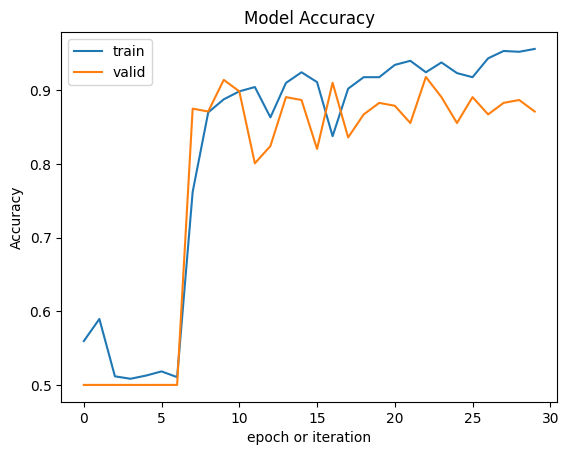

In [ ]:
# Summarize the accuracy.

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch or iteration')
plt.legend(["train", 'valid'], loc = 'upper left')
plt.show()

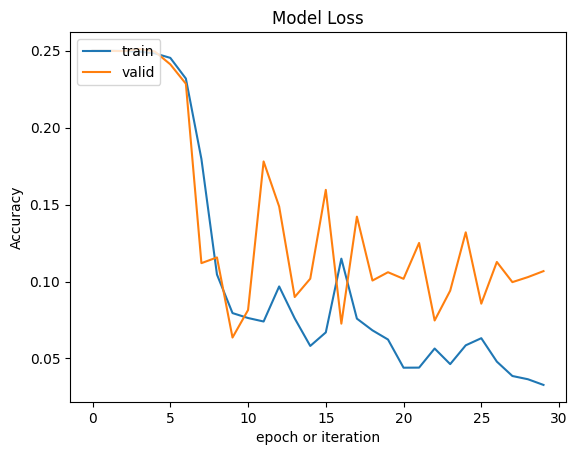

In [ ]:
# Summarize the Loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Accuracy')
plt.xlabel('epoch or iteration')
plt.legend(["train", 'valid'], loc = 'upper left')
plt.show()

##**Prediksi Model**
Kode ini memungkinkan untuk memilih 1 atau lebih file dari sistem file, mengunggahnya, dan menjalankannya melalui model, memberikan indikasi apakah objek tersebut adalah kuda atau manusia.

In [ ]:
# save model and architecture to single file
model.save("model.h5")
print("Saved model to disk")

Saved model to disk


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
## NOTE: Jika Anda menggunakan Safari dan sel ini menimbulkan kesalahan,
## silahkan lewati blok ini dan jalankan blok berikutnya.

import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  # memprediksi gambar
  path = '/content/' + fn
  img = load_img(path, target_size=(150, 150))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])

  if classes[0]>0.5:
    print(fn + " adalah manusia")
  else:
    print(fn + " adalah kuda")


Saving horse01-3.png to horse01-3.png
1/1 [==============================] - 1s 752ms/step
[0.03045413]
horse01-3.png adalah kuda
